In [55]:
# Pre-work2 - Kaggle competition - Titanic 
import pandas as pd

#Step1: Import data
train=pd.read_csv("Prework2-Titanic/train.csv")
target=train.pop("Survived")

In [56]:
#Step2: Descriptive Statistics

#Part2a - Check missing data 
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
#Part2b
# Missing data in variable"Age since record count is 714 only which is less than total record count (891).
# Impute Age with mean value

train['Age'].fillna(train.Age.mean(), inplace=True)
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
#Step2b: Data Manipulation
#Numeric Variables

num_var = list(train.dtypes[train.dtypes !="object"].index)
train[num_var].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22,1,0,7.2500
1,2,1,38,1,0,71.2833
2,3,3,26,0,0,7.9250
3,4,1,35,1,0,53.1000
4,5,3,35,0,0,8.0500


In [59]:
#Categorical Variables
def cat_describe(dfile):
    from IPython.display import display, HTML
    display(HTML(dfile[dfile.columns[dfile.dtypes == "object"]].describe().to_html()))
cat_describe(train)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [60]:
#Step3 Train the model
#Step3a: Model1: Fit by all numeric variables 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

model1 = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=43)
model1.fit(train[num_var], target)
model1.oob_score_
target_oob = model1.oob_prediction_
print "C-stat:", roc_auc_score(target, target_oob)

C-stat: 0.740682154688


In [61]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [62]:
# Fill in missing Embared as "S"
train["Embarked"].fillna("S", inplace=True)

In [63]:
#Step3b: Model2: Add categorical variables into model1 

#Convert categorical Variables into dummy variables 
train.drop(['Name', 'Cabin', 'PassengerId', 'Ticket'] ,axis=1, inplace=True)

cat_var = ['Sex', 'Embarked']

for variable in cat_var:
    train[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(train[variable], prefix=variable)
    train=pd.concat([train,dummies],axis=1)
    train.drop([variable],axis=1,inplace=True)
    

In [64]:
#Fit Model2
model2 = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=43)

model2.fit(train, target)

model2.oob_score_
target_oob = model2.oob_prediction_
print "C-stat:", roc_auc_score(target, target_oob)

C-stat: 0.86306042885


In [65]:
#Check the features for model2
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7.2500,0,1,0,0,1
1,1,38,1,0,71.2833,1,0,1,0,0
2,3,26,0,0,7.9250,1,0,0,0,1
3,1,35,1,0,53.1000,1,0,0,0,1
4,3,35,0,0,8.0500,0,1,0,0,1


In [66]:
%matplotlib inline

In [67]:
#Step3c: View feature for model2 with higher C-stat

model2.feature_importances_

array([ 0.10238282,  0.24744927,  0.04777301,  0.02498584,  0.23768045,
        0.15580152,  0.15087019,  0.01105187,  0.00603551,  0.01596953])

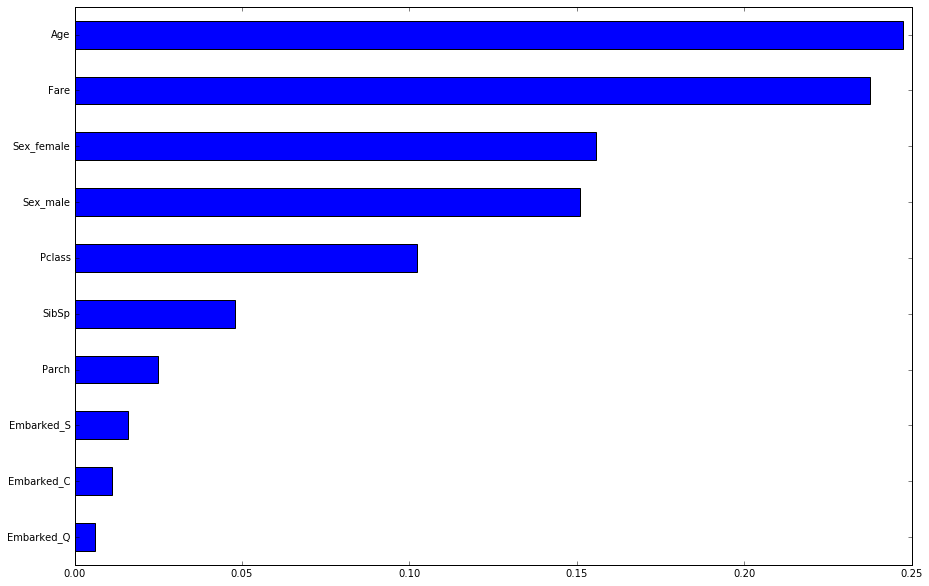

In [68]:
#Feature importances of model2
feamodel2 = pd.Series(model2.feature_importances_, index=train.columns)
feamodel2.sort_values(inplace= True)
feamodel2.plot(kind="barh", figsize=(15,10))

In [69]:
#Step4: Fine-tune the model to make it much better
#Step4a - optimized estimator
optimizeresult = []
n_time = [30, 50, 75, 100, 200, 300, 400, 500, 750, 1000, 2000, 3000, 4000, 5000]

for trees in n_time:
    model2_1 = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=43)
    model2_1.fit(train, target)
    print trees, "trees"
    roc = roc_auc_score(target, model2_1.oob_prediction_)
    print "C-stat: ", roc
    optimizeresult.append(roc)

30 trees
C-stat:  0.850850562959
50 trees
C-stat:  0.855137996783
75 trees
C-stat:  0.860780898817
100 trees
C-stat:  0.86306042885
200 trees
C-stat:  0.861774198703
300 trees
C-stat:  0.861720938655
400 trees
C-stat:  0.862043161943
500 trees
C-stat:  0.862495872346
750 trees
C-stat:  0.86230946218
1000 trees
C-stat:  0.862344081211
2000 trees
C-stat:  0.861281543263
3000 trees
C-stat:  0.861198990189
4000 trees
C-stat:  0.860746279786
5000 trees
C-stat:  0.861127089125


In [71]:
# The optimized estimator is 100
train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,1,0,0


In [72]:
#Step4b - optimized feature
optimizefeature = []
n_features = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for f_option in n_features:
    model2_2 = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=43, max_features=f_option)
    model2_2.fit(train, target)
    print f_option
    roc = roc_auc_score(target, model2_2.oob_prediction_)
    print "Stat: ", roc
    optimizefeature.append(roc)
    

auto
Stat:  0.86306042885
None
Stat:  0.86306042885
sqrt
Stat:  0.859116522332
log2
Stat:  0.859116522332
0.9
Stat:  0.862802117619
0.2
Stat:  0.860791550826


In [73]:
# The optimized feature option is auto 

In [74]:
#Step4c - optimized leaf
optimizeleaf = []
n_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in n_leaf:
    model2_2 = RandomForestRegressor(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=43, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model2_2.fit(train, target)
    print min_samples, "min samples"
    roc = roc_auc_score(target, model2_2.oob_prediction_)
    print "C-stat: ", roc
    optimizeleaf.append(roc)

1 min samples
C-stat:  0.86306042885
2 min samples
C-stat:  0.868053558304
3 min samples
C-stat:  0.872016105838
4 min samples
C-stat:  0.874769650295
5 min samples
C-stat:  0.875217034694
6 min samples
C-stat:  0.875318228784
7 min samples
C-stat:  0.874189115777
8 min samples
C-stat:  0.870764494722
9 min samples
C-stat:  0.869933637981
10 min samples
C-stat:  0.867920408185


In [75]:
# The optimized leaf is 6

In [76]:
#Step5a
# Final Model 
model3 = RandomForestRegressor(100, oob_score=True,n_jobs=-1,random_state=43, max_features="auto", min_samples_leaf=6)
model3.fit(train, target)
roc = roc_auc_score(target, model3.oob_prediction_)
print "Result of Final Model C-stat: ", roc

Result of Final Model C-stat:  0.875318228784


In [77]:
#Step5b - Using RandomForestClassifier to create prediction (0,1) 
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(100, oob_score=True,n_jobs=-1,random_state=43, max_features="auto", min_samples_leaf=6)
final_model = final_model.fit(train,target)
print final_model 
print ''

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=43, verbose=0, warm_start=False)



In [78]:
#Step6a - Apply model result to the test data
test=pd.read_csv("Prework2-Titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [79]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [80]:
# Same as training data, Impute Age with mean value

test['Age'].fillna(test.Age.mean(), inplace=True)
test['Fare'].fillna(test.Fare.mean(), inplace=True)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [81]:
num_var = list(test.dtypes[test.dtypes !="object"].index)
test[num_var].head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [82]:
id_pass = test['PassengerId'].values

In [83]:
#Categorical Variables
test.drop(['Name', 'Cabin', 'PassengerId', 'Ticket'] ,axis=1, inplace=True)

cat_var = ['Sex', 'Embarked']

for variable in cat_var:
    test[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(test[variable], prefix=variable)
    test=pd.concat([test,dummies],axis=1)
    test.drop([variable],axis=1,inplace=True)

In [84]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636,0.636364,0.244019,0.110048,0.645933
std,0.841838,12.634534,0.896760,0.981429,55.840500,0.481622,0.481622,0.430019,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
#Step6b - Prediction
import csv as csv
print 'After Prediction as below:'
final_model_predict = final_model.predict(test)
final_model_predict = final_model.predict(test).astype(int)
print final_model_predict

predictions_result = open("prework_titanic.csv", "wb")
open_file_object = csv.writer(predictions_result)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(id_pass, final_model_predict))
#open_file_object.writerows(zip(pid, final_model_predict))
predictions_result.close()

After Prediction as below:
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]
